In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[131]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./titanic/train.csv')
df_kg = pd.read_csv('./titanic/test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_kg.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_kg.drop(['Name'], axis=1, inplace=True)

df_kg.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_kg.Cabin.fillna('N', inplace=True)
df_kg.Fare.fillna(df1.Fare.median(), inplace=True)
df_kg.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_kg.Cabin = df_kg.Cabin.apply(lambda x:x[0])


# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_kg[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_kg[i] = globals()[f'df_kg_{i}_encoder'].transform(df_kg[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=19)

In [5]:
# In[181]:


dt_clf1 = DecisionTreeClassifier()
dt_clf1.fit(X, y)
dt_hat1 = dt_clf1.predict(df_kg)
result_df = pd.DataFrame({'dt1':dt_hat1})
result_df.index = list(range(892, 892 + result_df.shape[0]))


# In[182]:


dt_clf2 = DecisionTreeClassifier(ccp_alpha=0.01)
dt_clf2.fit(X, y)
dt_hat2 = dt_clf2.predict(df_kg)
result_df['dt2'] = dt_hat2


# In[184]:


dt_clf3 = DecisionTreeClassifier(max_depth=5)
dt_clf3.fit(X, y)
dt_hat3 = dt_clf3.predict(df_kg)
result_df['dt3'] = dt_hat3


# In[186]:


dt_clf4 = DecisionTreeClassifier(min_samples_split=5)
dt_clf4.fit(X, y)
dt_hat4 = dt_clf4.predict(df_kg)
result_df['dt4'] = dt_hat4


# In[188]:


bg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bg_clf.fit(X, y)
print(bg_clf.oob_score_)
bg_hat = bg_clf.predict(df_kg)
result_df['bg1'] = bg_hat


# In[196]:


bg_clf1 = BaggingClassifier(base_estimator=RandomForestClassifier(),
                           n_estimators=1000, bootstrap=False, n_jobs=-1)
bg_clf1.fit(X, y)
bg_hat1 = bg_clf1.predict(df_kg)
result_df['bg2'] = bg_hat1


# In[221]:


rf_clf  = RandomForestClassifier(n_estimators=2000, bootstrap=True, max_samples=0.5,
                                 max_depth=7, n_jobs=-1, oob_score=True)
rf_clf.fit(X, y)
print(rf_clf.oob_score_)
rf_hat = rf_clf.predict(df_kg)
result_df['rf'] = rf_hat


# In[224]:


rf_clf1  = RandomForestClassifier(n_estimators=2000, bootstrap=True, max_samples=0.2,
                                 ccp_alpha=0.05, n_jobs=-1, oob_score=True)
rf_clf1.fit(X, y)
print(rf_clf1.oob_score_)
rf_hat1 = rf_clf1.predict(df_kg)
result_df['rf1'] = rf_hat1


# In[226]:


et_clf  = ExtraTreesClassifier(n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
et_clf.fit(X, y)
print(et_clf.oob_score_)
et_hat = et_clf.predict(df_kg)
result_df['et'] = et_hat


# In[239]:


et_clf1  = ExtraTreesClassifier(n_estimators=100, min_samples_split=10, bootstrap=False, n_jobs=-1)
et_clf1.fit(X, y)
et_hat1 = et_clf1.predict(df_kg)
result_df['et1'] = et_hat1


# In[251]:


knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_10 = KNeighborsClassifier(n_neighbors=10)
knn_clf_20 = KNeighborsClassifier(n_neighbors=20)
knn_clf_30 = KNeighborsClassifier(n_neighbors=30)
knn_clf_40 = KNeighborsClassifier(n_neighbors=40)
knn_clf_5.fit(X, y)
knn_clf_10.fit(X, y)
knn_clf_20.fit(X, y)
knn_clf_30.fit(X, y)
knn_clf_40.fit(X, y)
result_df['knn5'] = knn_clf_5.predict(df_kg)
result_df['knn10'] = knn_clf_10.predict(df_kg)
result_df['knn20'] = knn_clf_20.predict(df_kg)
result_df['knn30'] = knn_clf_30.predict(df_kg)
result_df['knn40'] = knn_clf_40.predict(df_kg)


# In[261]:


lr_clf  = LogisticRegression(C=0.05)
lr_clf.fit(X, y)
result_df['lr'] = lr_clf.predict(df_kg)


# In[263]:


svm_clf = SVC(probability=True, kernel='rbf')
svm_clf1 = SVC(probability=True, kernel='poly')
svm_clf2 = SVC(probability=True, kernel='sigmoid')
svm_clf.fit(X, y)
svm_clf1.fit(X, y)
svm_clf2.fit(X, y)
result_df['svm'] = svm_clf.predict(df_kg)
result_df['svm1'] = svm_clf1.predict(df_kg)
result_df['svm2'] = svm_clf2.predict(df_kg)

0.8383838383838383
0.8327721661054994
0.7755331088664422
0.8215488215488216


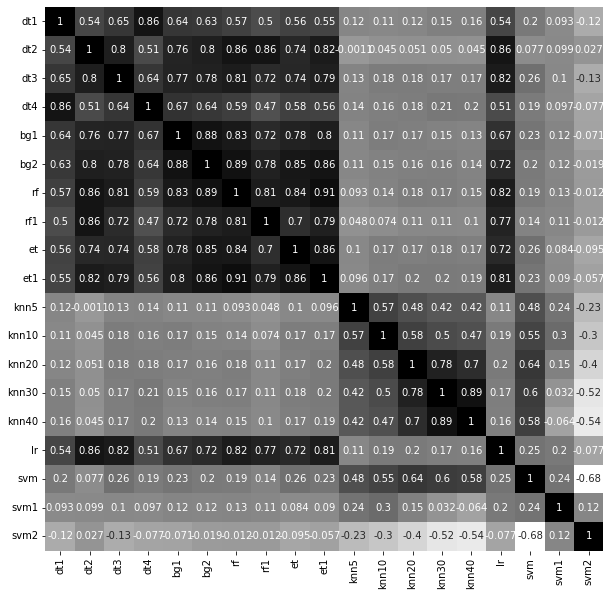

In [7]:
# In[264]:


result_df.corr()


# In[266]:


plt.figure(figsize=(10,10))
sns.heatmap(result_df.corr(),annot=True, cbar=False, cmap='binary')
plt.show()

In [8]:
# In[ ]:


clfs = [('dt1', dt_clf1), ('dt2', dt_clf2), ('dt3', dt_clf3), ('dt4', dt_clf4),
        ('bg', bg_clf), ('bg1', bg_clf1), 
        ('rf', rf_clf), ('rf1', rf_clf1), 
        ('et', et_clf), ('et1', et_clf1),
        ('knn5', knn_clf_5), ('knn10', knn_clf_10), ('knn20', knn_clf_20),
        ('knn30', knn_clf_30), ('knn40', knn_clf_40),
        ('lr', lr_clf),
        ('svm', svm_clf), ('svm1', svm_clf1), ('svm2', svm_clf2)]


# In[267]:


vo_clf  = VotingClassifier(estimators=clfs, voting='soft')
vo_clf.fit(X_train, y_train)
vo_clf.score(X_val, y_val)

0.8777777777777778

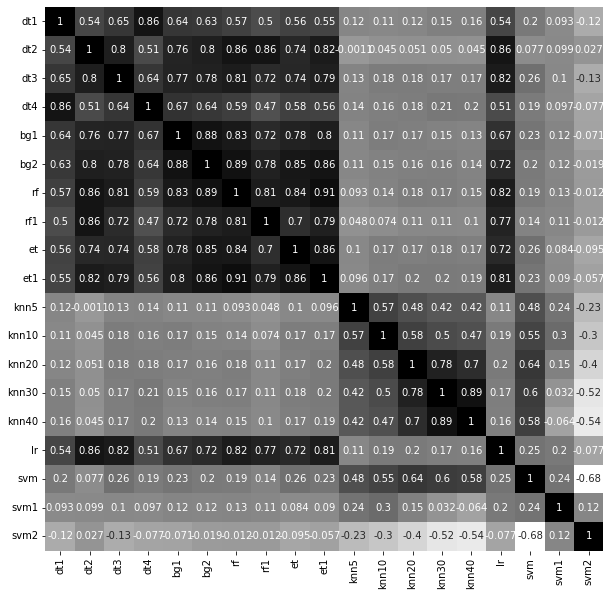

KeyboardInterrupt: 

In [6]:
# In[268]:


vo_clf.fit(X, y)
kg_up = df_kg.copy()
kg_up['Survived'] = vo_clf.predict(df_kg)
kg_up.Survived.to_csv('kaggle_upload_bagging3.csv')


# In[ ]: